# Callbacks on Irrigation Machine

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
# Instantiate a Sequential model
model = Sequential()

In [3]:
# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, input_shape=(20,), activation='relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with binary crossentropy loss
model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


In [5]:
irrigation = pd.read_csv('irrigation_machine.csv', index_col=0)

In [6]:
parcels = irrigation[['parcel_0', 'parcel_1', 'parcel_2']].to_numpy()
sensors = irrigation.drop(['parcel_0', 'parcel_1', 'parcel_2'], axis=1).to_numpy()

In [7]:
sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors, parcels, test_size=0.3, stratify=parcels)

In [8]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
35/35 [==============================] - 1s 29ms/step - loss: 0.6185 - accuracy: 0.4973 - val_loss: 0.4906 - val_accuracy: 0.6107
Epoch 2/100
35/35 [==============================] - 1s 17ms/step - loss: 0.4620 - accuracy: 0.5964 - val_loss: 0.3953 - val_accuracy: 0.5929
Epoch 3/100
35/35 [==============================] - 0s 8ms/step - loss: 0.3785 - accuracy: 0.5973 - val_loss: 0.3424 - val_accuracy: 0.6393
Epoch 4/100
35/35 [==============================] - 0s 12ms/step - loss: 0.3295 - accuracy: 0.6089 - val_loss: 0.3163 - val_accuracy: 0.6714
Epoch 5/100
35/35 [==============================] - 0s 11ms/step - loss: 0.3017 - accuracy: 0.6205 - val_loss: 0.3024 - val_accuracy: 0.6286
Epoch 6/100
35/35 [==============================] - 0s 8ms/step - loss: 0.2827 - accuracy: 0.6116 - val_loss: 0.2913 - val_accuracy: 0.6857
Epoch 7/100
35/35 [==============================] - 0s 9ms/step - loss: 0.2704 - accuracy: 0.6116 - val_loss: 0.2910 - val_accuracy: 0.6750
Epoch 8/1

In [9]:
# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

In [10]:
# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

Rounded Predictions: 
 [[1. 1. 0.]
 [1. 1. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 1. 0.]
 [1. 1. 0.]]


In [11]:
# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

19/19 [==============================] - 0s 5ms/step - loss: 0.2747 - accuracy: 0.5350


## History of Callbacks

In [17]:
import matplotlib.pyplot as plt

In [12]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

In [13]:
def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [14]:
# Replace variables
X_train, y_train = sensors_train, parcels_train
X_test, y_test = sensors_test, parcels_test

In [15]:
h_callback = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
44/44 [==============================] - 1s 17ms/step - loss: 0.1541 - accuracy: 0.6171 - val_loss: 0.2682 - val_accuracy: 0.6033
Epoch 2/50
44/44 [==============================] - 1s 14ms/step - loss: 0.1526 - accuracy: 0.6036 - val_loss: 0.2683 - val_accuracy: 0.6333
Epoch 3/50
44/44 [==============================] - 1s 13ms/step - loss: 0.1527 - accuracy: 0.6164 - val_loss: 0.2622 - val_accuracy: 0.5450
Epoch 4/50
44/44 [==============================] - 1s 12ms/step - loss: 0.1476 - accuracy: 0.6079 - val_loss: 0.2654 - val_accuracy: 0.6150
Epoch 5/50
44/44 [==============================] - 1s 15ms/step - loss: 0.1491 - accuracy: 0.6021 - val_loss: 0.2683 - val_accuracy: 0.5683
Epoch 6/50
44/44 [==============================] - 1s 15ms/step - loss: 0.1488 - accuracy: 0.6136 - val_loss: 0.2625 - val_accuracy: 0.6150
Epoch 7/50
44/44 [==============================] - 1s 14ms/step - loss: 0.1479 - accuracy: 0.6129 - val_loss: 0.2659 - val_accuracy: 0.5850
Epoch 8/50
44

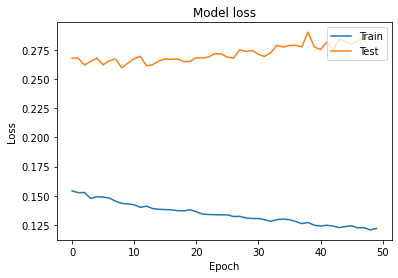

In [18]:
# Plot loss
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

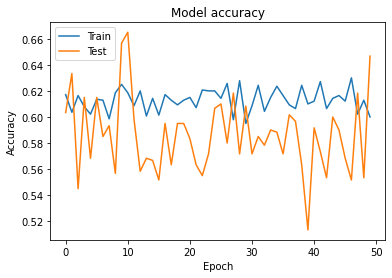

In [19]:
# Plot train vs test accuracy
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])